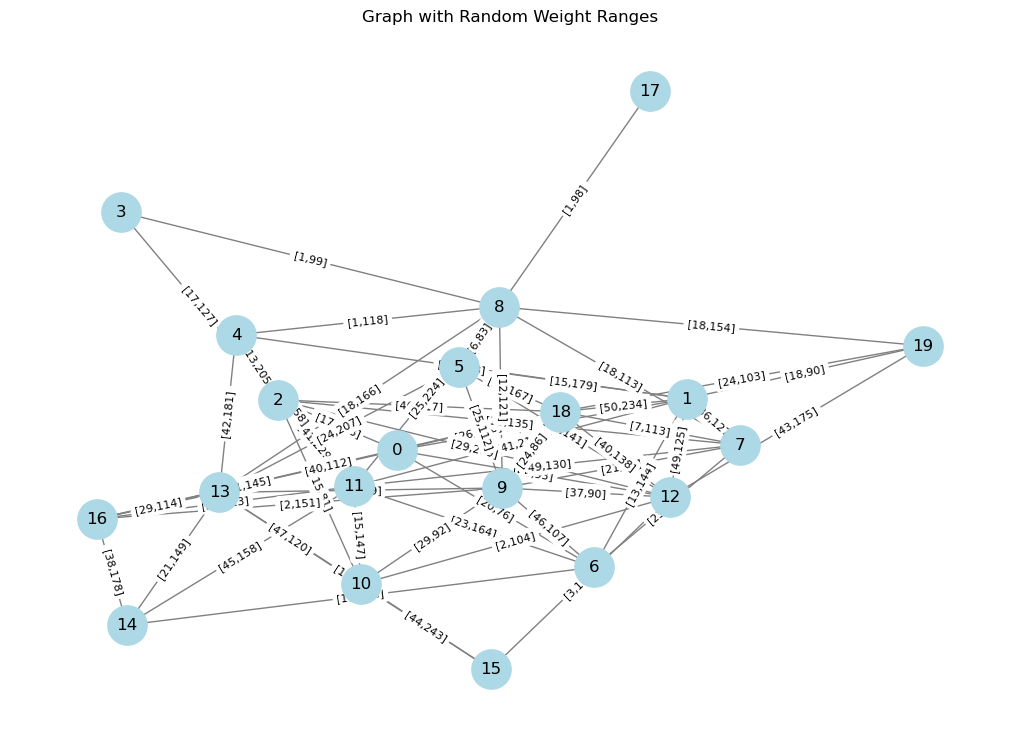

Expected shortest path from 0 to 15: 119.72


In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import heapq

# Dijkstra implementation
def dijkstra(graph, source, target, weights):
    n = graph.number_of_nodes()
    dist = {node: float('inf') for node in graph.nodes}
    dist[source] = 0
    pq = [(0, source)]
    
    while pq:
        d, u = heapq.heappop(pq)
        if u == target:
            return d
        if d > dist[u]:
            continue
        for v in graph.neighbors(u):
            w = weights[(u, v)]
            if dist[u] + w < dist[v]:
                dist[v] = dist[u] + w
                heapq.heappush(pq, (dist[v], v))
    return float('inf')

# Build large random graph
n_nodes = 20
G = nx.gnp_random_graph(n_nodes, 0.3, directed=False)  # 30% edge density

# Assign unique weight ranges to each edge
edge_ranges = {}
for u, v in G.edges:
    low = random.randint(1, 50)
    high = low + random.randint(50, 200)
    edge_ranges[(u, v)] = (low, high)
    edge_ranges[(v, u)] = (low, high)  # undirected consistency

# Visualize the graph
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(10, 7))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=800, edge_color="gray")
edge_labels = {e: f"[{low},{high}]" for e,(low,high) in edge_ranges.items() if e[0] < e[1]}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title("Graph with Random Weight Ranges")
plt.show()

# Monte Carlo simulation for expected shortest path
def expected_shortest_path(G, edge_ranges, source, target, simulations=5000):
    total = 0
    count = 0
    for _ in range(simulations):
        weights = {}
        for e in G.edges:
            low, high = edge_ranges[e]
            w = random.randint(low, high)
            weights[e] = w
            weights[(e[1], e[0])] = w  # undirected
        
        dist = dijkstra(G, source, target, weights)
        if dist < float('inf'):
            total += dist
            count += 1
    return total / count if count > 0 else float('inf')

# Example: expected shortest path from 0 to 15
exp_value = expected_shortest_path(G, edge_ranges, 0, 15, simulations=3000)
print(f"Expected shortest path from 0 to 15: {exp_value:.2f}")